In [2]:
import numpy as np
import pandas as pd
from pyne import data, nucname
from pyne.material import Material
from matplotlib import pyplot as plt

%matplotlib inline

In [10]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [3]:
results_path = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'

In [4]:
db = pd.read_pickle(results_path + 'nuc32_activities_scaled_1g_reindex.pkl')

In [6]:
idx = 66796

In [7]:
db.loc[idx]

ReactorType              bwr
CoolingTime          1776.72
Enrichment              4.11
Burnup               44015.2
OrigenReactor        ge7x7-0
AvgPowerDensity           22
ModDensity               0.7
UiWeight                   1
ac227                6.6e-12
am241               0.001231
am243              3.823e-05
ba133              2.719e-08
cf249              1.977e-11
cf252              1.183e-10
cm243              3.294e-05
cm244               0.005405
cm245              6.525e-07
cs134                0.03898
cs137                 0.1224
eu152              1.274e-06
eu154               0.005434
ho166m             2.895e-10
kr85                 0.00872
nb94               2.339e-10
np236              1.751e-12
np237              4.675e-07
pa231              3.857e-11
pm146              2.318e-08
pu236              2.485e-07
pu238               0.005383
pu239              0.0002583
pu240              0.0002736
ra226               2.51e-13
sb125               0.002744
th228         

# Plot Spectrum

In [5]:
detector_dir = 'detector_response/d2_detective_hpge/'
numcol = 8192
detector_path = results_path + detector_dir
datidx = '742'
datgz = detector_path + datidx + '.dat.gz'
def get_energy_bins(bindata):
    with open(bindata) as binfile:
        contents = binfile.readlines()
    binlist = []
    for ebin in contents[1].strip().split(' '):
        binlist.append(float(ebin))
    return binlist
energy_bins = get_energy_bins(detector_path + 'energy_bins.dat')

In [8]:
# reads in all 90 spectra in *.dat.gz into a df, and puts energy bins as columns
df = pd.read_csv(datgz, sep=' ', index_col=0, header=None, usecols=range(0, numcol+1), names=['DbIdx']+energy_bins, compression='gzip')

In [32]:
en_list_pkl = 'idx133717_energy_list_d2auto.pkl' #energy_list_short.pkl, long, or idx133717_energy_list_d*auto.pkl
en_list = pd.read_pickle(results_path + 'detector_response/' + en_list_pkl)

In [33]:
en_delta = 3 #energy window in keV

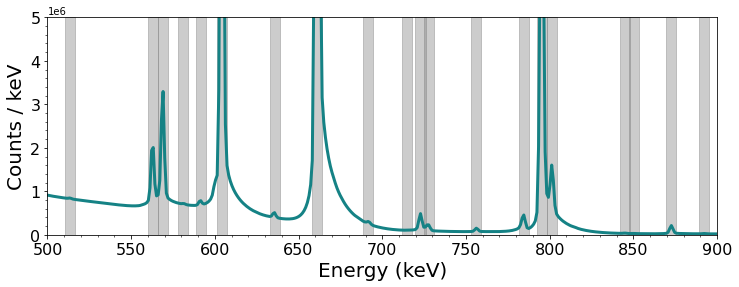

In [34]:
def story_plot(df_idx):
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(energy_bins, df.loc[df_idx], color=colors['MTeal'], linewidth=3)
    ax.minorticks_on()
    for en in en_list:
        ax.axvspan(en - en_delta, en + en_delta, color='grey', alpha=0.4)
    #ax.set_title('Energy', fontsize=14)
    ax.set_xlim(500, 900)
    ax.set_ylim(0, 5e6)
    ax.set_xlabel('Energy (keV)', fontsize=20)
    ax.set_ylabel('Counts / keV', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    #fig.savefig('../plots/spectrum_for_story_idx66796.png', bbox_inches='tight', transparent=True)
story_plot(idx)

# Check MLL results for d2 auto

In [17]:
mll = pd.read_csv(results_path + 'mll/gam_spec/d2_auto/Job2_unc0.0/Job2_unc0.0.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [18]:
mll.loc[idx]

sim_idx                       66796
ReactorType                     bwr
CoolingTime                 1776.72
Enrichment                     4.11
Burnup                      44015.2
OrigenReactor               ge7x7-0
AvgPowerDensity                  22
ModDensity                      0.7
UiWeight                          1
pred_idx                      39919
pred_ReactorType                bwr
pred_CoolingTime             1950.2
pred_Enrichment                2.04
pred_Burnup                 44015.2
pred_OrigenReactor          ge7x7-0
pred_AvgPowerDensity             22
pred_ModDensity                 0.7
pred_UiWeight                     1
MaxLogLL                   -38133.1
MaxLLUnc                    387.551
2ndMaxLogLL                  -40575
2ndMaxLLUnc                 401.273
CDF_LogLL_0.9998            -280903
CDF_LLUnc_0.9998        8.26572e+09
CDF_LogLL_0.9988            -785607
CDF_LLUnc_0.9988        3.87603e+09
CDF_LogLL_0.95          -1.6768e+07
CDF_LLUnc_0.95          4.72

# Check MLL results for nuc29

In [25]:
mll2 = pd.read_csv(results_path + 'mll/nuc_conc/nuc29/Job0_unc0.01/Job0_unc0.01.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [26]:
mll2.loc[idx]

sim_idx                       66796
ReactorType                     bwr
CoolingTime                 1776.72
Enrichment                     4.11
Burnup                      44015.2
OrigenReactor               ge7x7-0
AvgPowerDensity                  22
ModDensity                      0.7
UiWeight                          1
pred_idx                      66795
pred_ReactorType                bwr
pred_CoolingTime            1697.27
pred_Enrichment                4.11
pred_Burnup                 44015.2
pred_OrigenReactor          ge7x7-0
pred_AvgPowerDensity             22
pred_ModDensity                 0.7
pred_UiWeight                     1
MaxLogLL                   -409.385
MaxLLUnc                    33.5429
2ndMaxLogLL                -426.141
2ndMaxLLUnc                  43.575
CDF_LogLL_0.9998           -2506.08
CDF_LLUnc_0.9998        5.81036e+21
CDF_LogLL_0.9988           -5207.58
CDF_LLUnc_0.9988        2.26804e+21
CDF_LogLL_0.95             -30644.5
CDF_LLUnc_0.95          3.79

# Check MLL results for d2 short

In [30]:
mll3 = pd.read_csv(results_path + 'mll/gam_spec/d2_short/Job2_unc0.0/Job2_unc0.0.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [31]:
mll3.loc[idx]

sim_idx                       66796
ReactorType                     bwr
CoolingTime                 1776.72
Enrichment                     4.11
Burnup                      44015.2
OrigenReactor               ge7x7-0
AvgPowerDensity                  22
ModDensity                      0.7
UiWeight                          1
pred_idx                     308716
pred_ReactorType                bwr
pred_CoolingTime            1759.27
pred_Enrichment                4.27
pred_Burnup                 43855.6
pred_OrigenReactor         svea64-1
pred_AvgPowerDensity             22
pred_ModDensity                 0.7
pred_UiWeight                     1
MaxLogLL                   -25511.1
MaxLLUnc                    318.206
2ndMaxLogLL                -26210.5
2ndMaxLLUnc                 322.726
CDF_LogLL_0.9998            -133460
CDF_LLUnc_0.9998        2.43651e+08
CDF_LogLL_0.9988            -515440
CDF_LLUnc_0.9988         1.5207e+08
CDF_LogLL_0.95         -1.34809e+07
CDF_LLUnc_0.95          6.73

# Check Preds from Scikit

In [35]:
preds = ['reactor', 'burnup', 'enrichment', 'cooling']

### d2 auto

In [37]:
for pred in preds:
    knn = pd.read_csv(results_path + 'scikit/gam_spec/cv_pred/cv5/auto/' + pred + '_knn_tset1.0_d2_hpge_predictions.csv').drop(columns='Unnamed: 0')
    dtr = pd.read_csv(results_path + 'scikit/gam_spec/cv_pred/cv5/auto/' + pred + '_dtree_tset1.0_d2_hpge_predictions.csv').drop(columns='Unnamed: 0')
    print(knn.loc[idx])
    print(dtr.loc[idx])

TrueY        bwr
kNN          bwr
AbsError    True
Name: 66796, dtype: object
TrueY         bwr
DTree         pwr
AbsError    False
Name: 66796, dtype: object
TrueY       44015.2
kNN         42446.8
AbsError     1568.4
Name: 66796, dtype: float64
TrueY       4.401520e+04
DTree       4.401520e+04
AbsError    7.275958e-12
Name: 66796, dtype: float64
TrueY       4.110000
kNN         3.290795
AbsError    0.819205
Name: 66796, dtype: float64
TrueY       4.11
DTree       4.11
AbsError    0.00
Name: 66796, dtype: float64
TrueY       1776.720343
kNN         1839.938712
AbsError      63.218369
Name: 66796, dtype: float64
TrueY       1776.720343
DTree       1992.634875
AbsError     215.914532
Name: 66796, dtype: float64


### nuc29

In [40]:
for pred in preds:
    knn = pd.read_csv(results_path + 'scikit/nuc_conc/cv_pred/cv5/nuc29/' + pred + '_knn_tset1.0_nuc29_predictions.csv').drop(columns='Unnamed: 0')
    dtr = pd.read_csv(results_path + 'scikit/nuc_conc/cv_pred/cv5/nuc29/' + pred + '_dtree_tset1.0_nuc29_predictions.csv').drop(columns='Unnamed: 0')
    print(knn.loc[idx])
    print(dtr.loc[idx])

TrueY        bwr
kNN          bwr
AbsError    True
Name: 66796, dtype: object
TrueY        bwr
DTree        bwr
AbsError    True
Name: 66796, dtype: object
TrueY       44015.2
kNN         44015.2
AbsError        0.0
Name: 66796, dtype: float64
TrueY       4.401520e+04
DTree       4.401520e+04
AbsError    2.182787e-11
Name: 66796, dtype: float64
TrueY       4.11
kNN         4.11
AbsError    0.00
Name: 66796, dtype: float64
TrueY       4.110000e+00
DTree       4.110000e+00
AbsError    1.154632e-14
Name: 66796, dtype: float64
TrueY       1776.720343
kNN         1775.968569
AbsError       0.751774
Name: 66796, dtype: float64
TrueY       1776.720343
DTree       1776.720343
AbsError       0.000000
Name: 66796, dtype: float64
